# Libraries 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import preprocessing


warnings.filterwarnings('ignore')

# Load Data

In [94]:
sales_train_df = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
item_categories_df = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')
items_df = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
shops_df = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
test_set_df = pd.read_csv('competitive-data-science-predict-future-sales/test.csv')
sample_submission_df = pd.read_csv('competitive-data-science-predict-future-sales/sample_submission.csv')

print('sales_train_df: ',sales_train_df.shape)
print('item_categories_df ',item_categories_df.shape)
print('items_df ',items_df.shape)
print('shops_df ', shops_df.shape)

sales_train_df:  (2935849, 6)
item_categories_df  (84, 2)
items_df  (22170, 3)
shops_df  (60, 2)


In [3]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# Basic EDA before merging

## shops_df

##### There are duplicated names of the shops, so we have to deal with that

In [45]:
shops_df

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [95]:
def adjust_duplicated_shops(df):
    'Function that combines duplicated shop names'
    # from https://www.kaggle.com/taranenkodaria/predict-future-sales-the-russian-forecast
    # Test Set unique shop_id --> we should only use these ids
    # array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
    #   26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
    #   50, 52, 53, 55, 56, 57, 58, 59], dtype=int64)
    
    df.loc[df['shop_id'] == 0, 'shop_id'] = 57
    df.loc[df['shop_id'] == 1, 'shop_id'] = 58
    df.loc[df['shop_id'] == 10, 'shop_id'] = 11
    df.loc[df['shop_id'] == 40, 'shop_id'] = 39
    df.loc[df['shop_id'] == 23, 'shop_id'] = 24
    
    return df

In [96]:
sales_train_df_no_dupl_shops = adjust_duplicated_shops(sales_train_df)

In [97]:
print('Before adjustment')
print(sales_train_df['shop_id'].value_counts().sort_index())

print('After adjustment')
print(sales_train_df_no_dupl_shops['shop_id'].value_counts().sort_index())

Before adjustment
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
11     21896
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
20      1792
21     58133
22     45434
24     59995
25    186104
26     53910
27    105366
28    142234
29     49225
30     50860
31    235636
32      7947
33      5027
34      5752
35     58445
36       306
37     39638
38     46013
39     17697
41     41967
42    109253
43     39282
44     39530
45     35891
46     66321
47     56695
48     21612
49     15849
50     65173
51     44433
52     43502
53     52921
54    143480
55     34769
56     69573
57    127285
58     77119
59     42108
Name: shop_id, dtype: int64
After adjustment
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
11     21896
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
2

##### Exctract features from shop_name

In [98]:
# drop already deleted "shop_id"
shops_df = shops_df.loc[~shops_df['shop_id'].isin([0, 1, 10, 40, 23])]

In [99]:
shops_df

,shop_name,shop_id
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9
11,Жуковский ул. Чкалова 39м²,11
12,Интернет-магазин ЧС,12


In [100]:
def extract_shop_type(df):
    'Extracts type of the shop and creates the shop_type_1 and shop_type_2 columns'
    
    df['shop_type_1'] = 'NONE'
    df['shop_type_2'] = 'NONE'
    
    df.loc[df['shop_name'].str.contains('ТЦ'),'shop_type_1'] = 'type_1'
    df.loc[df['shop_name'].str.contains('ТК'),'shop_type_1'] = 'type_2'
    df.loc[df['shop_name'].str.contains('ТРЦ'),'shop_type_1'] = 'type_3'
    df.loc[df['shop_name'].str.contains('ТРК'),'shop_type_1'] = 'type_4' 
    
    df.loc[(df['shop_name'].str.contains('ТЦ')) |
           (df['shop_name'].str.contains('ТК')),'shop_type_2'] = 'type_1'
    df.loc[(df['shop_name'].str.contains('ТРЦ')) |
           (df['shop_name'].str.contains('ТРК')),'shop_type_2'] = 'type_2'
    
    return df

def extract_shop_city(df):
    'Extracts shop city name and city type and creates two new columns'
    
    # City type: 1 if city is Moscow or Sankt Petersburg (they are quite different from the rest of Russia)
    df['shop_city_type'] = 0
    
    df['shop_city'] = df['shop_name'].str.split(' ').str[0]
    df.loc[df['shop_city'].isin(['Москва','СПб']),'shop_city_type'] = 1
    
    le = preprocessing.LabelEncoder()
    df['shop_city'] = le.fit_transform(df['shop_city'])
    
    return df

In [101]:
shops_df = extract_shop_type(shops_df)
shops_df = extract_shop_city(shops_df)

In [102]:
shops_df

,shop_name,shop_id,shop_type_1,shop_type_2,shop_city_type,shop_city
2,"Адыгея ТЦ ""Мега""",2,type_1,type_1,0,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,type_4,type_2,0,1
4,"Волжский ТЦ ""Волга Молл""",4,type_1,type_1,0,2
5,"Вологда ТРЦ ""Мармелад""",5,type_3,type_2,0,3
6,"Воронеж (Плехановская, 13)",6,NONE,NONE,0,4
7,"Воронеж ТРЦ ""Максимир""",7,type_3,type_2,0,4
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,type_3,type_2,0,4
9,Выездная Торговля,9,NONE,NONE,0,5
11,Жуковский ул. Чкалова 39м²,11,NONE,NONE,0,6
12,Интернет-магазин ЧС,12,NONE,NONE,0,7


## item_categories_df

In [103]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [104]:
def correct_item_category_name(df):
    'adjust the format of the "item_category_name" column'
    df.loc[df['item_category_name'] == 'Билеты (Цифра)','item_category_name'] = 'Билеты - Цифра'
    df.loc[df['item_category_name'] == 'Доставка товара','item_category_name'] = 'Доставка товара - service'
    df.loc[df['item_category_name'] == 'Карты оплаты (Кино, Музыка, Игры)',
           'item_category_name'] = 'Карты оплаты - Кино, Музыка, Игры'
    df.loc[df['item_category_name'] == 'Служебные','item_category_name'] = 'Служебные - none'
    df.loc[df['item_category_name'] == 'Чистые носители (шпиль)','item_category_name'] = 'Чистые носители - шпиль'
    df.loc[df['item_category_name'] == 'Чистые носители (штучные)','item_category_name'] = 'Чистые носители - штучные'
    df.loc[df['item_category_name'] == 'Элементы питания','item_category_name'] = 'Элементы питания - none'
    
    return df

item_categories_df_corrected = correct_item_category_name(item_categories_df)

# Check the results
for item in item_categories_df_corrected['item_category_name']:
    print(item)

PC - Гарнитуры/Наушники
Аксессуары - PS2
Аксессуары - PS3
Аксессуары - PS4
Аксессуары - PSP
Аксессуары - PSVita
Аксессуары - XBOX 360
Аксессуары - XBOX ONE
Билеты - Цифра
Доставка товара - service
Игровые консоли - PS2
Игровые консоли - PS3
Игровые консоли - PS4
Игровые консоли - PSP
Игровые консоли - PSVita
Игровые консоли - XBOX 360
Игровые консоли - XBOX ONE
Игровые консоли - Прочие
Игры - PS2
Игры - PS3
Игры - PS4
Игры - PSP
Игры - PSVita
Игры - XBOX 360
Игры - XBOX ONE
Игры - Аксессуары для игр
Игры Android - Цифра
Игры MAC - Цифра
Игры PC - Дополнительные издания
Игры PC - Коллекционные издания
Игры PC - Стандартные издания
Игры PC - Цифра
Карты оплаты - Кино, Музыка, Игры
Карты оплаты - Live!
Карты оплаты - Live! (Цифра)
Карты оплаты - PSN
Карты оплаты - Windows (Цифра)
Кино - Blu-Ray
Кино - Blu-Ray 3D
Кино - Blu-Ray 4K
Кино - DVD
Кино - Коллекционное
Книги - Артбуки, энциклопедии
Книги - Аудиокниги
Книги - Аудиокниги (Цифра)
Книги - Аудиокниги 1С
Книги - Бизнес литература
Книги

##### Extract features

In [105]:
item_categories_df_corrected.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [115]:
def extract_main_category(df):
    df['item_category_main'] = df['item_category_name'].str.split(' - ').str[0]

    le = preprocessing.LabelEncoder()
    df['item_category_main'] = le.fit_transform(df['item_category_main'])

    return df

def extract_whether_digital(df):
    df['is_category_digital'] = 0
    df.loc[df['item_category_name'].str.contains('Цифра'),'is_category_digital'] = 1
    
    return df

def extract_ps_related(df):
    df['is_category_ps_related'] = 0
    df.loc[df['item_category_name'].str.contains('PS'),'is_category_ps_related'] = 1
    
    return df


In [116]:
item_categories_df_corrected = extract_main_category(item_categories_df_corrected)
item_categories_df_corrected = extract_whether_digital(item_categories_df_corrected)
item_categories_df_corrected = extract_ps_related(item_categories_df_corrected)

In [117]:
item_categories_df_corrected.sample(20)

,item_category_name,item_category_id,item_category_main,is_category_digital,is_category_ps_related
53,Книги - Художественная литература,53,11,0,0
26,Игры Android - Цифра,26,6,1,0
29,Игры PC - Коллекционные издания,29,8,0,0
1,Аксессуары - PS2,1,1,0,1
27,Игры MAC - Цифра,27,7,1,0
18,Игры - PS2,18,5,0,1
8,Билеты - Цифра,8,2,1,0
9,Доставка товара - service,9,3,0,0
62,"Подарки - Гаджеты, роботы, спорт",62,13,0,0
72,Подарки - Фигурки,72,13,0,0


## items_df

In [120]:
test_set_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


# Merging Data

## Aggregation

Need to shape dataset into a test set aggregation
    - prices for each item change
    - daily aggregation or montly?

In [7]:
sales_train_montly_df = sales_train_df.groupby(['date_block_num','shop_id',
                                                'item_id'])['item_price','item_cnt_day'].agg(['min','max','sum','mean'])
sales_train_montly_df = sales_train_montly_df.reset_index()

# Work with column names
l0_cols = list(sales_train_montly_df.columns.droplevel(0))
l1_cols = list(sales_train_montly_df.columns.droplevel(1))


colnames = ['{}_{}'.format(l1_cols[i], l0_cols[i]) for i in range(11)]
sales_train_montly_df.columns = colnames

sales_train_montly_df.columns = [x[:-1] if x[-1] == '_' else x for x in sales_train_montly_df.columns ]

C:\Users\kov6rt\.conda\envs\UC1_signature_detection\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [8]:
sales_train_montly_df

,date_block_num,shop_id,item_id,item_price_min,item_price_max,item_price_sum,item_price_mean,item_cnt_day_min,item_cnt_day_max,item_cnt_day_sum,item_cnt_day_mean
0,0,0,32,221.0,221.0,884.0,221.0,1.0,2.0,6.0,1.5
1,0,0,33,347.0,347.0,1041.0,347.0,1.0,1.0,3.0,1.0
2,0,0,35,247.0,247.0,247.0,247.0,1.0,1.0,1.0,1.0
3,0,0,43,221.0,221.0,221.0,221.0,1.0,1.0,1.0,1.0
4,0,0,51,127.0,130.0,257.0,128.5,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,119.0,357.0,119.0,1.0,3.0,6.0,2.0
1609120,33,59,22088,119.0,119.0,238.0,119.0,1.0,1.0,2.0,1.0
1609121,33,59,22091,179.0,179.0,179.0,179.0,1.0,1.0,1.0,1.0
1609122,33,59,22100,629.0,629.0,629.0,629.0,1.0,1.0,1.0,1.0


## Merge

In [9]:
items_df = items_df.merge(item_categories_df, on = 'item_category_id')
merged_df = sales_train_montly_df.merge(shops_df, on = 'shop_id')
merged_df = merged_df.merge(items_df, on = 'item_id')

merged_df.head()

,date_block_num,shop_id,item_id,item_price_min,item_price_max,item_price_sum,item_price_mean,item_cnt_day_min,item_cnt_day_max,item_cnt_day_sum,item_cnt_day_mean,shop_name,item_name,item_category_id,item_category_name
0,0,0,32,221.0,221.0,884.0,221.0,1.0,2.0,6.0,1.500000,"!Якутск Орджоникидзе, 56 фран",1+1,40,Кино - DVD
1,1,0,32,221.0,221.0,1547.0,221.0,1.0,2.0,10.0,1.428571,"!Якутск Орджоникидзе, 56 фран",1+1,40,Кино - DVD
2,0,1,32,221.0,221.0,1326.0,221.0,1.0,2.0,7.0,1.166667,"!Якутск ТЦ ""Центральный"" фран",1+1,40,Кино - DVD
3,1,1,32,221.0,221.0,663.0,221.0,1.0,1.0,3.0,1.000000,"!Якутск ТЦ ""Центральный"" фран",1+1,40,Кино - DVD
4,12,2,32,119.0,119.0,119.0,119.0,1.0,1.0,1.0,1.000000,"Адыгея ТЦ ""Мега""",1+1,40,Кино - DVD


In [10]:
merged_df.shape

(1609124, 15)

# Basic EDA

No NANs

In [11]:
merged_df.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price_min        0
item_price_max        0
item_price_sum        0
item_price_mean       0
item_cnt_day_min      0
item_cnt_day_max      0
item_cnt_day_sum      0
item_cnt_day_mean     0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64

## Shop ID

In [12]:
print('Shops in train set: ', merged_df['shop_id'].nunique())
print('Shops in test set: ', test_set_df['shop_id'].nunique())

Shops in train set:  60
Shops in test set:  42


Should I need to exclude the missing shops from Train Set?

In [13]:
merged_df['shop_id'].value_counts()[:12]

31    99241
25    87977
54    70471
28    64639
57    59972
42    56861
27    48438
6     47250
56    43876
58    37954
21    36830
46    36659
Name: shop_id, dtype: int64

# shop_name

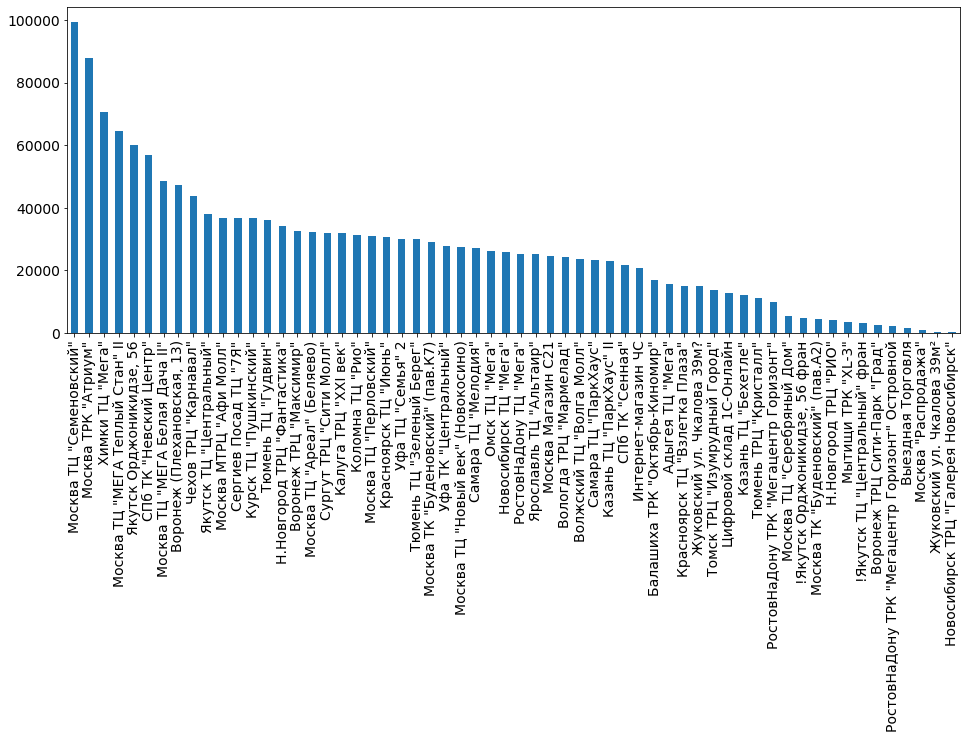

In [16]:
fig, axes = plt.subplots(figsize = (16,6)) 
merged_df['shop_name'].value_counts().plot(kind = 'bar', ax = axes, fontsize = 14)

In [29]:
np.sort(test_set_df['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59], dtype=int64)

In [31]:
sales_train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


SyntaxError: invalid syntax (<ipython-input-20-6379f3ddfda8>, line 2)

In [26]:
for i in np.sort(merged_df['shop_id'].unique()):
    temp_df = merged_df.loc[merged_df['shop_id'] == i, ['shop_id','shop_name']]
    print(i, temp_df['shop_name'].unique()[0])

0 !Якутск Орджоникидзе, 56 фран
1 !Якутск ТЦ "Центральный" фран
2 Адыгея ТЦ "Мега"
3 Балашиха ТРК "Октябрь-Киномир"
4 Волжский ТЦ "Волга Молл"
5 Вологда ТРЦ "Мармелад"
6 Воронеж (Плехановская, 13)
7 Воронеж ТРЦ "Максимир"
8 Воронеж ТРЦ Сити-Парк "Град"
9 Выездная Торговля
10 Жуковский ул. Чкалова 39м?
11 Жуковский ул. Чкалова 39м²
12 Интернет-магазин ЧС
13 Казань ТЦ "Бехетле"
14 Казань ТЦ "ПаркХаус" II
15 Калуга ТРЦ "XXI век"
16 Коломна ТЦ "Рио"
17 Красноярск ТЦ "Взлетка Плаза"
18 Красноярск ТЦ "Июнь"
19 Курск ТЦ "Пушкинский"
20 Москва "Распродажа"
21 Москва МТРЦ "Афи Молл"
22 Москва Магазин С21
23 Москва ТК "Буденовский" (пав.А2)
24 Москва ТК "Буденовский" (пав.К7)
25 Москва ТРК "Атриум"
26 Москва ТЦ "Ареал" (Беляево)
27 Москва ТЦ "МЕГА Белая Дача II"
28 Москва ТЦ "МЕГА Теплый Стан" II
29 Москва ТЦ "Новый век" (Новокосино)
30 Москва ТЦ "Перловский"
31 Москва ТЦ "Семеновский"
32 Москва ТЦ "Серебряный Дом"
33 Мытищи ТРК "XL-3"
34 Н.Новгород ТРЦ "РИО"
35 Н.Новгород ТРЦ "Фантастика"
36 Но

In [19]:
for i in merged_df['shop_name'].unique():
    print(i,'____' , i.split(' ')[1])

!Якутск Орджоникидзе, 56 фран ____ Орджоникидзе,
!Якутск ТЦ "Центральный" фран ____ ТЦ
Адыгея ТЦ "Мега" ____ ТЦ
Балашиха ТРК "Октябрь-Киномир" ____ ТРК
Волжский ТЦ "Волга Молл" ____ ТЦ
Воронеж (Плехановская, 13) ____ (Плехановская,
Воронеж ТРЦ "Максимир" ____ ТРЦ
Воронеж ТРЦ Сити-Парк "Град" ____ ТРЦ
Жуковский ул. Чкалова 39м? ____ ул.
Интернет-магазин ЧС ____ ЧС
Казань ТЦ "Бехетле" ____ ТЦ
Казань ТЦ "ПаркХаус" II ____ ТЦ
Калуга ТРЦ "XXI век" ____ ТРЦ
Коломна ТЦ "Рио" ____ ТЦ
Красноярск ТЦ "Июнь" ____ ТЦ
Курск ТЦ "Пушкинский" ____ ТЦ
Москва МТРЦ "Афи Молл" ____ МТРЦ
Москва Магазин С21 ____ Магазин
Москва ТК "Буденовский" (пав.А2) ____ ТК
Москва ТК "Буденовский" (пав.К7) ____ ТК
Москва ТРК "Атриум" ____ ТРК
Москва ТЦ "Ареал" (Беляево) ____ ТЦ
Москва ТЦ "МЕГА Белая Дача II" ____ ТЦ
Москва ТЦ "МЕГА Теплый Стан" II ____ ТЦ
Москва ТЦ "Новый век" (Новокосино) ____ ТЦ
Москва ТЦ "Перловский" ____ ТЦ
Москва ТЦ "Семеновский" ____ ТЦ
Москва ТЦ "Серебряный Дом" ____ ТЦ
Н.Новгород ТРЦ "Фантастика" 